## Data simulation in splatter

Code from https://github.com/theislab/scib-reproducibility/tree/main/notebooks/data_preprocessing/simulations. Simulation were generated using the Splatter package.

In [1]:
proj_name = "simulate_splatter"
data_dir = paste0("../data/", proj_name, "/")
dir.create(data_dir)
save_dir = paste0("../save/", proj_name, format(Sys.time(), "%b%d"), "/")
dir.create(save_dir)
seed = 0
set.seed(seed)

In [2]:
library(splatter)

Loading required package: SingleCellExperiment



Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [4]:
params <- newSplatParams()
params

A Params object of class SplatParams 
Parameters can be (estimable) or [not estimable], 'Default' or  'NOT DEFAULT' 
Secondary parameters are usually set during simulation

Global: 
(Genes)  (Cells)   [SEED] 
  10000      100   869369 

29 additional parameters 

Batches: 
    [Batches]  [Batch Cells]     [Location]        [Scale]       [Remove] 
            1            100            0.1            0.1          FALSE 

Mean: 
 (Rate)  (Shape) 
    0.3      0.6 

Library size: 
(Location)     (Scale)      (Norm) 
        11         0.2       FALSE 

Exprs outliers: 
(Probability)     (Location)        (Scale) 
         0.05              4            0.5 

Groups: 
     [Groups]  [Group Probs] 
            1              1 

Diff expr: 
[Probability]    [Down Prob]     [Location]        [Scale] 
          0.1            0.5            0.1            0.4 

BCV: 
(Common Disp)          (DoF) 
          0.1             60 

Dropout: 
    [Type]  (Midpoint)     (Shape) 
      none         

In [6]:
getParam(params, "nGenes")
params <- setParam(params, "nGenes", 5000)
getParam(params, "nGenes")

[1] 10000

[1] 5000

In [7]:
params <- setParams(params, update = list(nGenes = 8000, mean.rate = 0.5))
# Extract multiple parameters as a list
getParams(params, c("nGenes", "mean.rate", "mean.shape"))

$nGenes
[1] 8000

$mean.rate
[1] 0.5

$mean.shape
[1] 0.6

In [8]:
params <- setParams(params, mean.shape = 0.5, de.prob = 0.2)
params


A Params object of class SplatParams 
Parameters can be (estimable) or [not estimable], 'Default' or  'NOT DEFAULT' 
Secondary parameters are usually set during simulation

Global: 
(GENES)  (Cells)   [SEED] 
   8000      100   869369 

29 additional parameters 

Batches: 
    [Batches]  [Batch Cells]     [Location]        [Scale]       [Remove] 
            1            100            0.1            0.1          FALSE 

Mean: 
 (RATE)  (SHAPE) 
    0.5      0.5 

Library size: 
(Location)     (Scale)      (Norm) 
        11         0.2       FALSE 

Exprs outliers: 
(Probability)     (Location)        (Scale) 
         0.05              4            0.5 

Groups: 
     [Groups]  [Group Probs] 
            1              1 

Diff expr: 
[PROBABILITY]    [Down Prob]     [Location]        [Scale] 
          0.2            0.5            0.1            0.4 

BCV: 
(Common Disp)          (DoF) 
          0.1             60 

Dropout: 
    [Type]  (Midpoint)     (Shape) 
      none         

In [9]:
params <- newSplatParams(lib.loc = 12, lib.scale = 0.6)
getParams(params, c("lib.loc", "lib.scale"))


$lib.loc
[1] 12

$lib.scale
[1] 0.6

In [11]:
sim <- splatSimulate(params, nGenes = 1000)

Getting parameters...

Creating simulation object...

Simulating library sizes...

Simulating gene means...

Simulating BCV...

Simulating counts...

Simulating dropout (if needed)...

Sparsifying assays...

Automatically converting to sparse matrices, threshold = 0.95

Skipping 'BatchCellMeans': estimated sparse size 1.5 * dense matrix

Skipping 'BaseCellMeans': estimated sparse size 1.5 * dense matrix

Skipping 'BCV': estimated sparse size 1.5 * dense matrix

Skipping 'CellMeans': estimated sparse size 1.5 * dense matrix

Skipping 'TrueCounts': estimated sparse size 2.76 * dense matrix

Skipping 'counts': estimated sparse size 2.76 * dense matrix

Done!



In [17]:
table(colData(sim)$Batch)


Batch1 
   100 

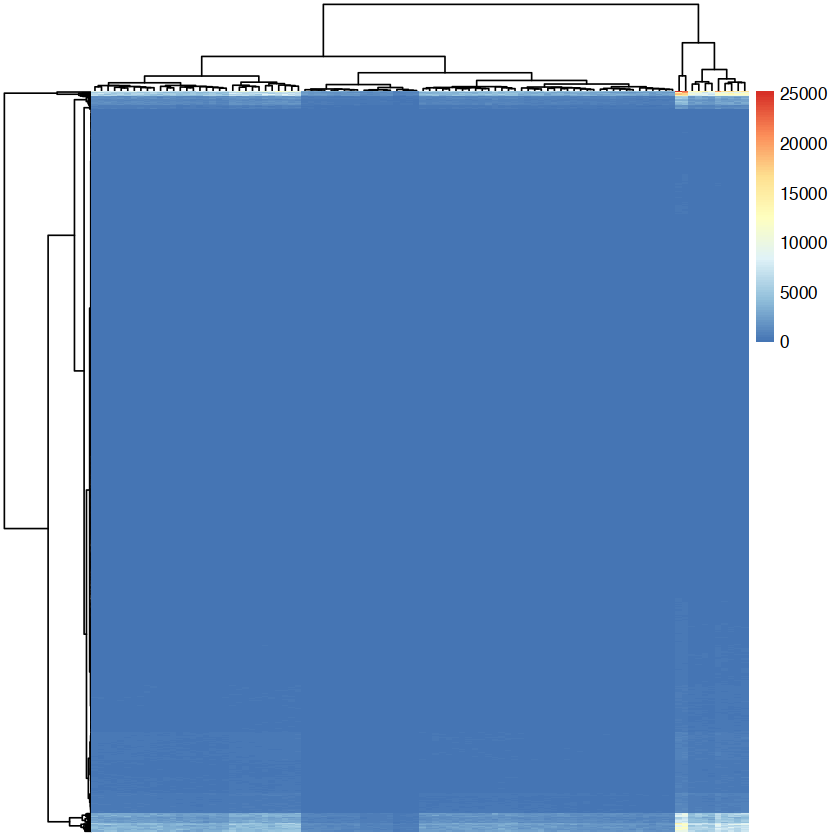

In [15]:
library(pheatmap)
pheatmap(as.matrix(assay(sim, "counts")),
         show_rownames = FALSE,            
         show_colnames = FALSE, 
         width = 10, height = 10)

Loading required package: scuttle



Loading required package: ggplot2

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
"You're computing too large a percentage of total singular values, use a standard svd instead."


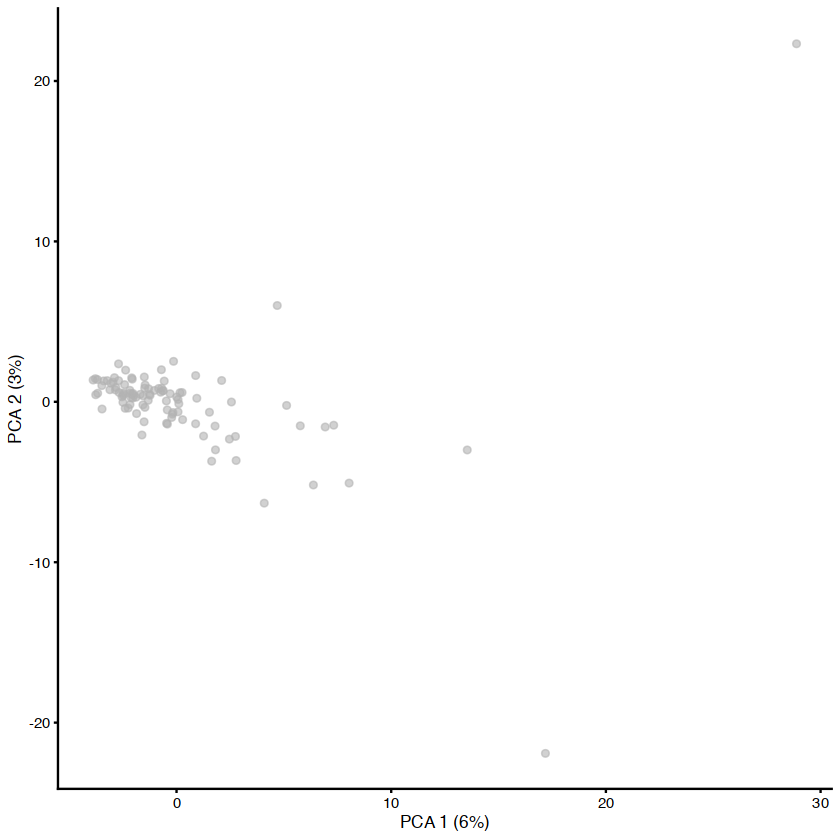

In [20]:
library(scater)
sim <- logNormCounts(sim)
# Plot PCA
sim <- runPCA(sim)
plotPCA(sim)

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
"You're computing too large a percentage of total singular values, use a standard svd instead."


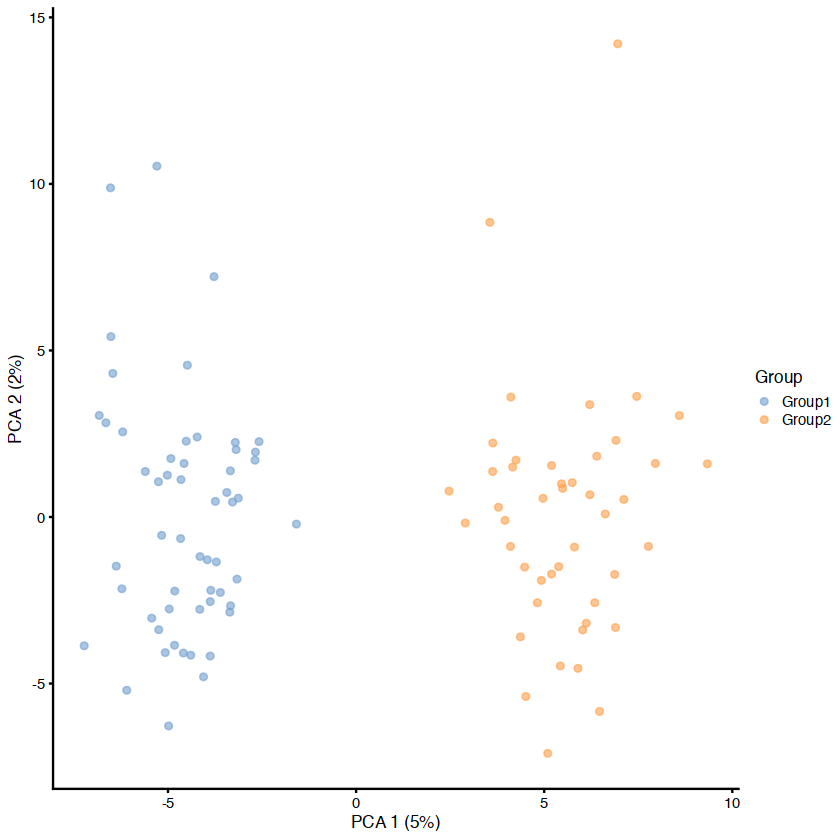

In [21]:
sim.groups <- splatSimulate(
    group.prob = c(0.5, 0.5),
    method = "groups",
    verbose = FALSE
)
sim.groups <- logNormCounts(sim.groups)
sim.groups <- runPCA(sim.groups)
plotPCA(sim.groups, colour_by = "Group")

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
"You're computing too large a percentage of total singular values, use a standard svd instead."


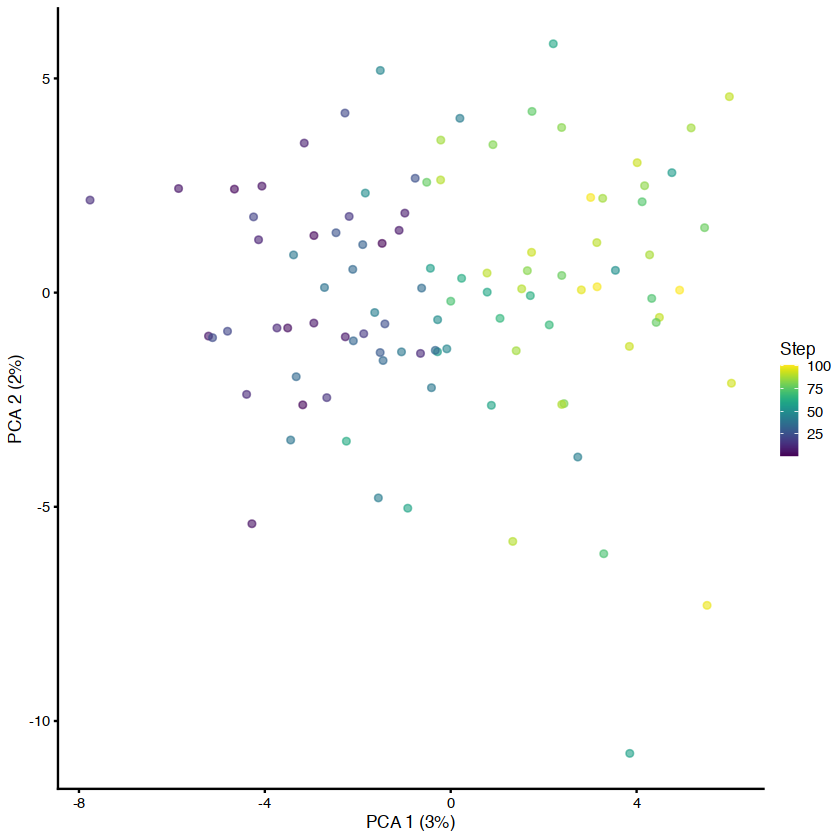

In [23]:
sim.paths <- splatSimulate(
    de.prob = 0.2,
    nGenes = 1000,
    method = "paths",
    verbose = FALSE
)
sim.paths <- logNormCounts(sim.paths)
sim.paths <- runPCA(sim.paths)
plotPCA(sim.paths, colour_by = "Step")

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
"You're computing too large a percentage of total singular values, use a standard svd instead."


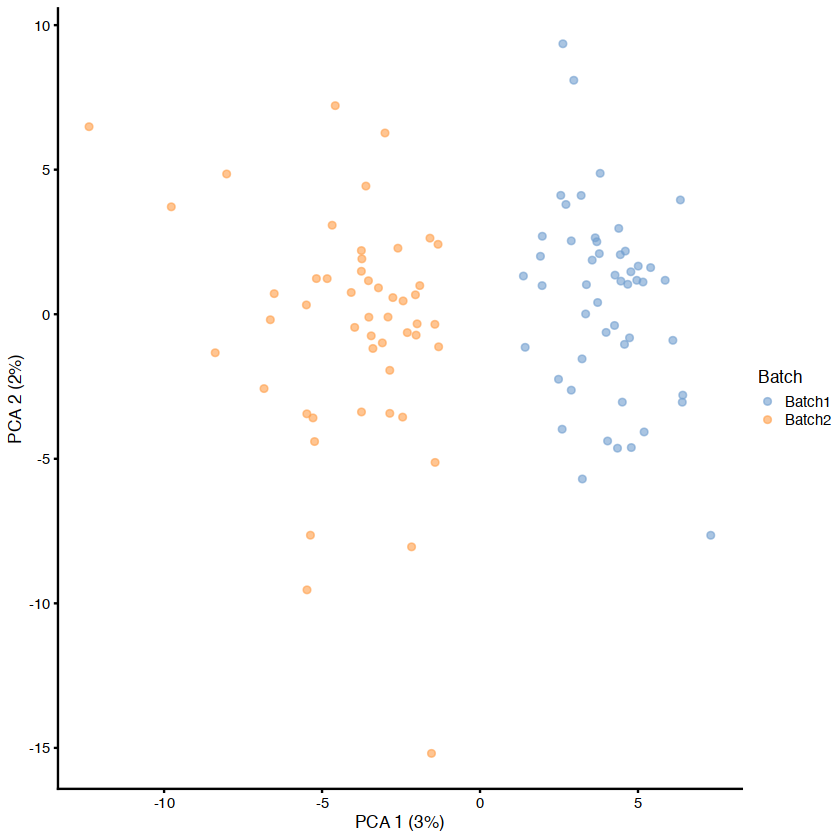

In [24]:
sim.batches <- splatSimulate(batchCells = c(50, 50), verbose = FALSE)
sim.batches <- logNormCounts(sim.batches)
sim.batches <- runPCA(sim.batches)
plotPCA(sim.batches, colour_by = "Batch")


Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
"You're computing too large a percentage of total singular values, use a standard svd instead."


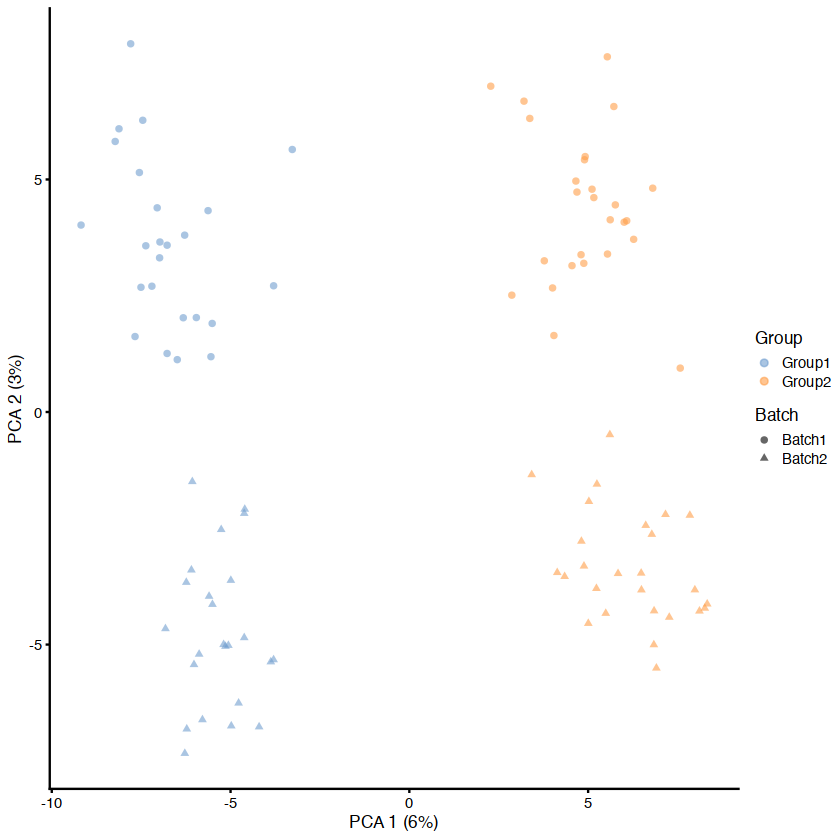

In [25]:
sim.groups <- splatSimulate(
    batchCells = c(50, 50),
    group.prob = c(0.5, 0.5),
    method = "groups",
    verbose = FALSE
)
sim.groups <- logNormCounts(sim.groups)
sim.groups <- runPCA(sim.groups)
plotPCA(sim.groups, shape_by = "Batch", colour_by = "Group")

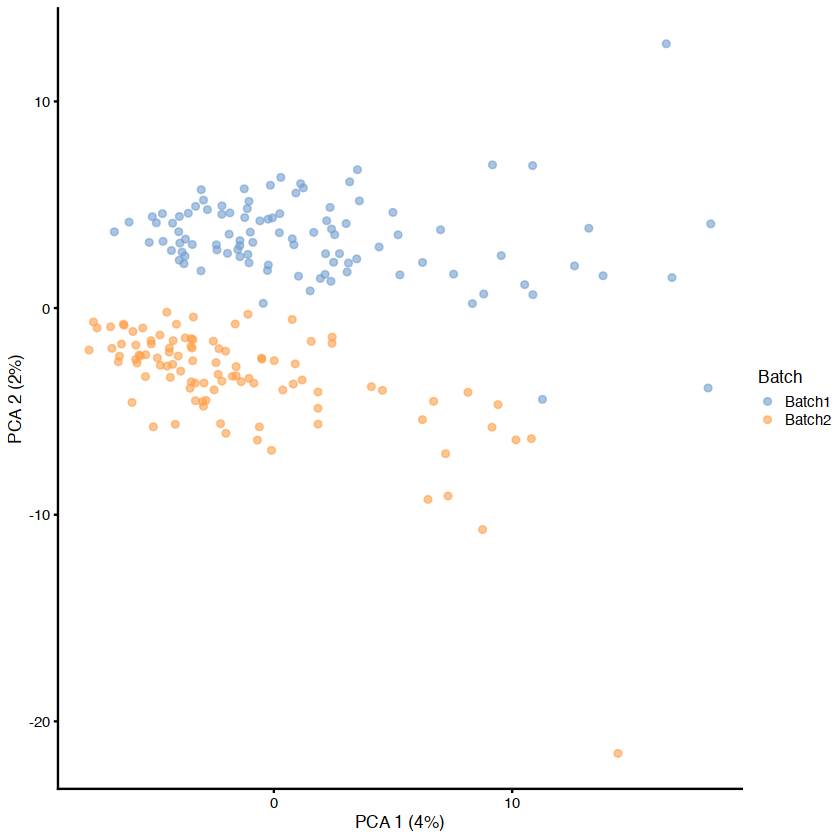

In [26]:
sim <- splatSimulate(params, batchCells = c(100, 100), verbose = FALSE)

# PCA plot using scater
sim <- logNormCounts(sim)
sim <- runPCA(sim)
plotPCA(sim, colour_by = "Batch")

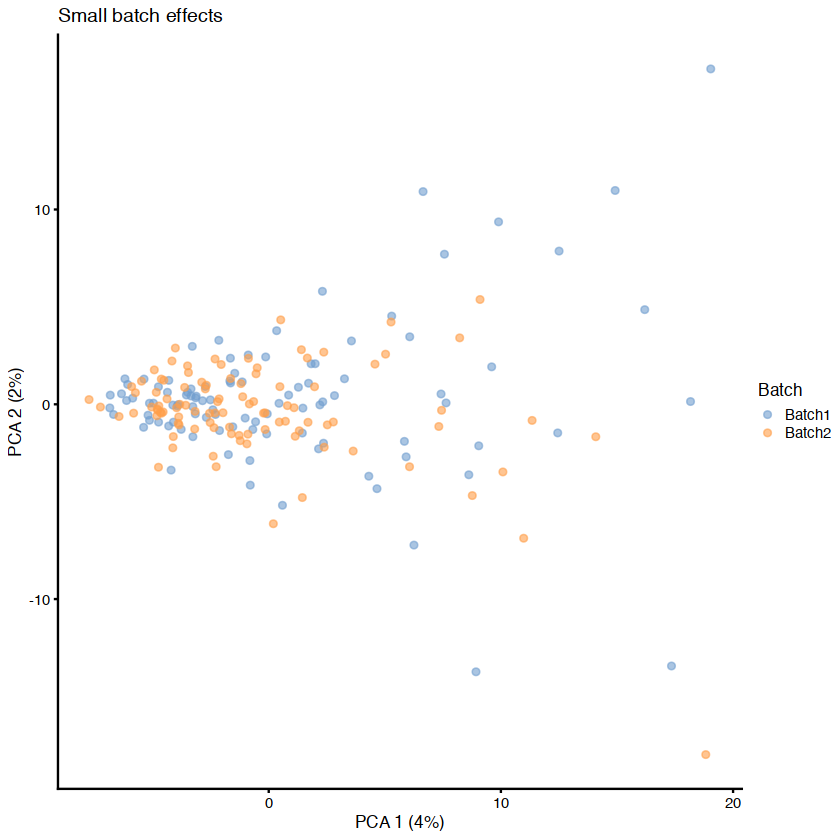

In [27]:
sim1 <- splatSimulate(
    params,
    batchCells = c(100, 100),
    batch.facLoc = 0.001,
    batch.facScale = 0.001,
    verbose = FALSE
)
sim1 <- logNormCounts(sim1)
sim1 <- runPCA(sim1)
plotPCA(sim1, colour_by = "Batch") + ggtitle("Small batch effects")

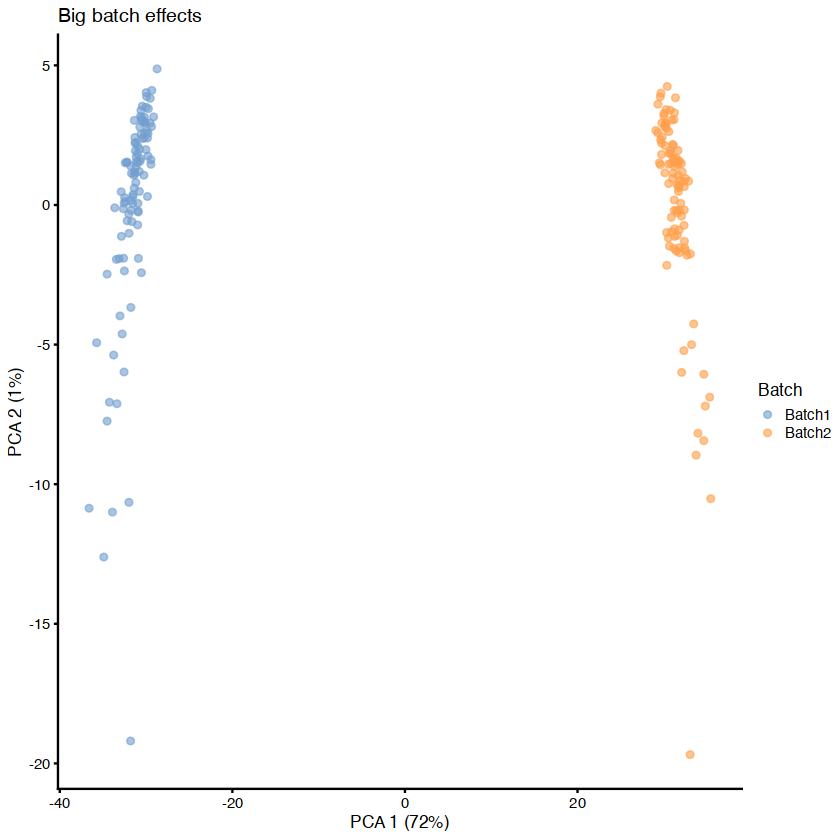

In [28]:
sim2 <- splatSimulate(
    params,
    batchCells = c(100, 100),
    batch.facLoc = 0.5,
    batch.facScale = 0.5,
    verbose = FALSE
)
sim2 <- logNormCounts(sim2)
sim2 <- runPCA(sim2)
plotPCA(sim2, colour_by = "Batch") + ggtitle("Big batch effects")

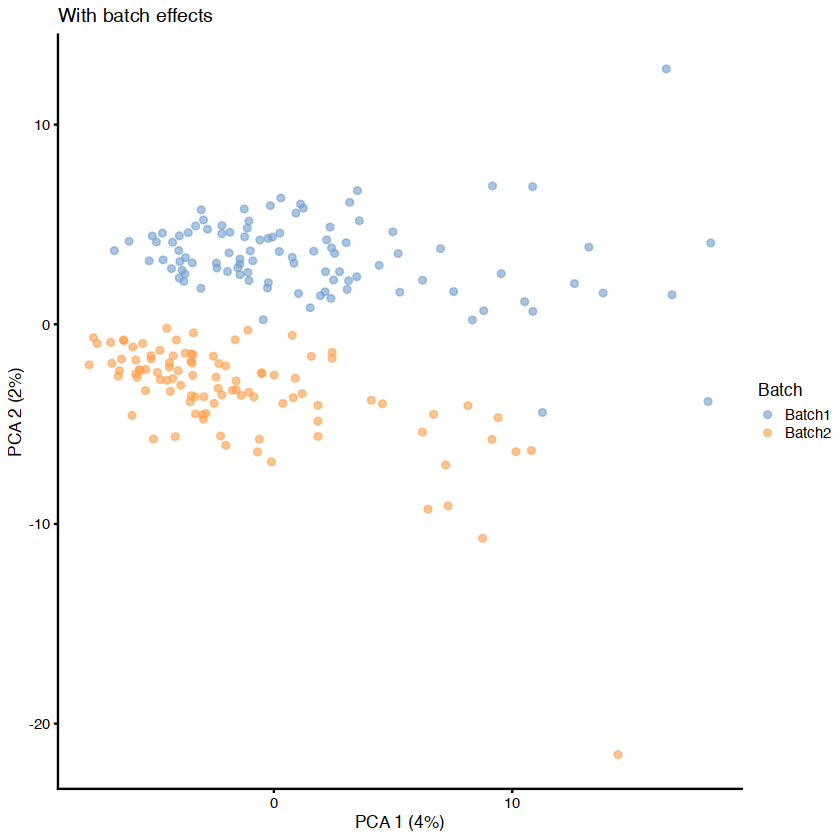

In [29]:
sim1 <- splatSimulate(
    params,
    batchCells = c(100, 100),
    batch.rmEffect = FALSE,
    verbose = FALSE
)
sim1 <- logNormCounts(sim1)
sim1 <- runPCA(sim1)
plotPCA(sim1, colour_by = "Batch") + ggtitle("With batch effects")

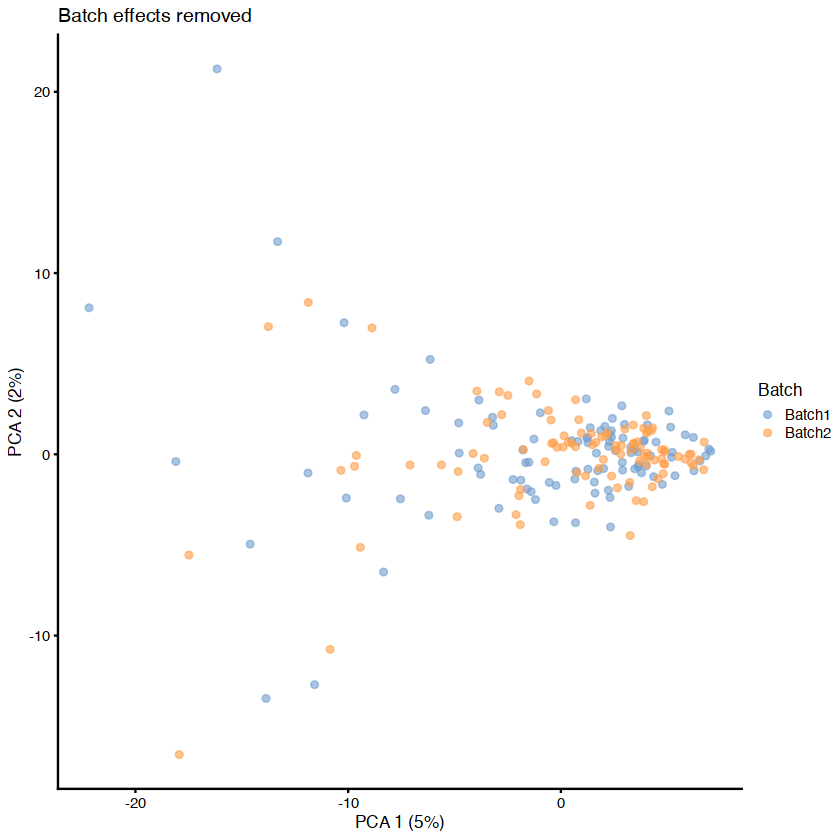

In [30]:
sim2 <- splatSimulate(
    params,
    batchCells = c(100, 100),
    batch.rmEffect = TRUE,
    verbose = FALSE
)
sim2 <- logNormCounts(sim2)
sim2 <- runPCA(sim2)
plotPCA(sim2, colour_by = "Batch") + ggtitle("Batch effects removed")

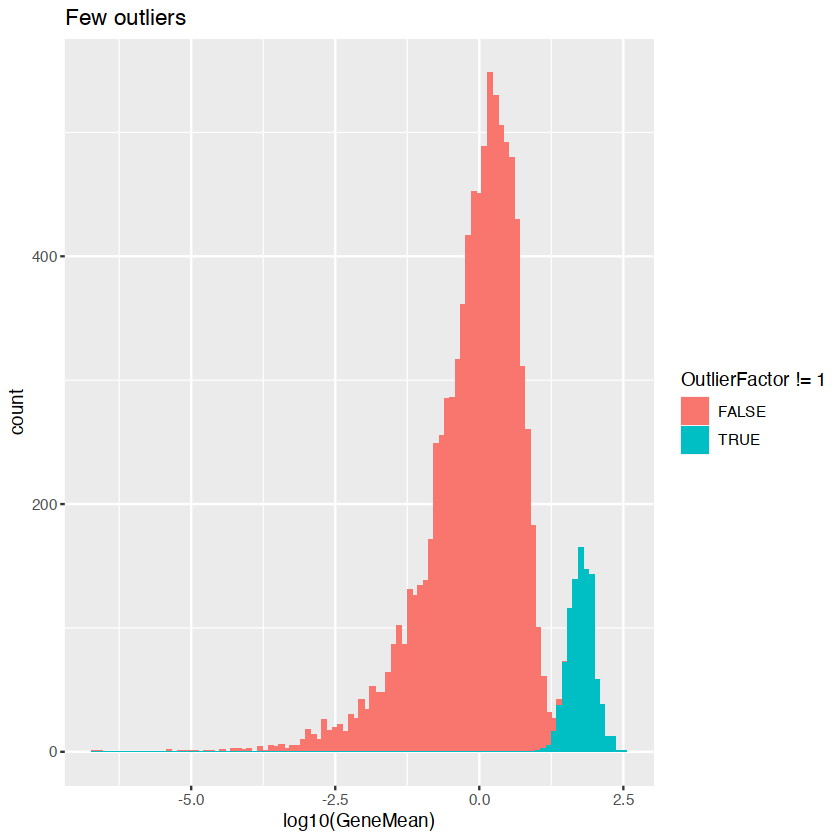

In [32]:
# Few outliers
sim1 <- splatSimulate(out.prob = 0.1, verbose = FALSE)
ggplot(
    as.data.frame(rowData(sim1)),
    aes(x = log10(GeneMean), fill = OutlierFactor != 1)
) +
    geom_histogram(bins = 100) +
    ggtitle("Few outliers")

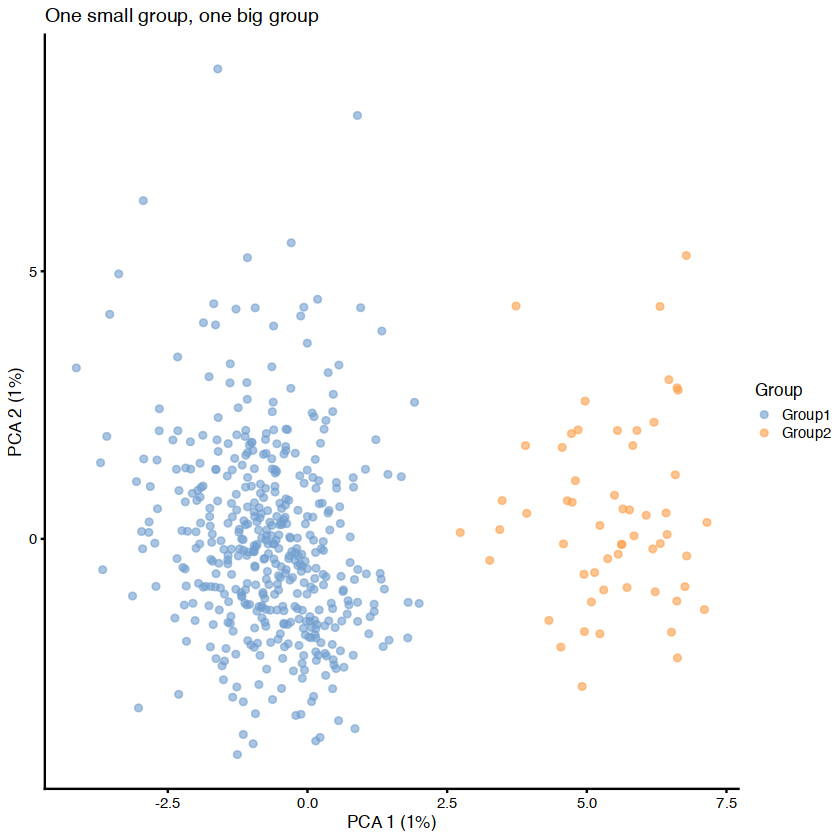

In [33]:
params.groups <- newSplatParams(batchCells = 500, nGenes = 1000)

# One small group, one big group
sim1 <- splatSimulateGroups(
    params.groups,
    group.prob = c(0.9, 0.1),
    verbose = FALSE
)
sim1 <- logNormCounts(sim1)
sim1 <- runPCA(sim1)
plotPCA(sim1, colour_by = "Group") + ggtitle("One small group, one big group")

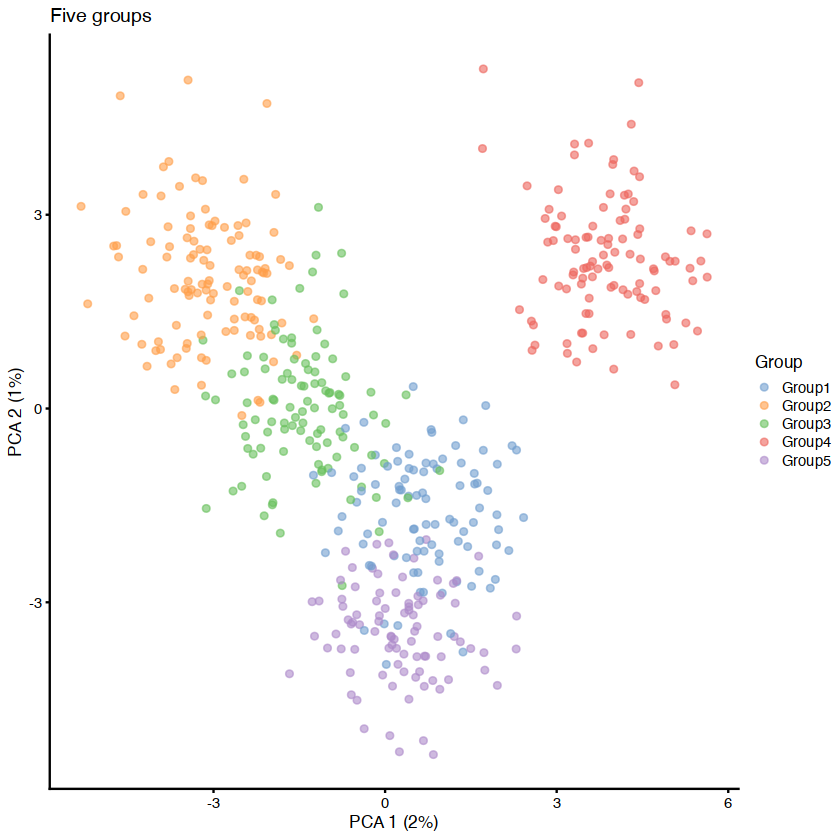

In [34]:
# Five groups
sim2 <- splatSimulateGroups(
    params.groups,
    group.prob = c(0.2, 0.2, 0.2, 0.2, 0.2),
    verbose = FALSE
)
sim2 <- logNormCounts(sim2)
sim2 <- runPCA(sim2)
plotPCA(sim2, colour_by = "Group") + ggtitle("Five groups")

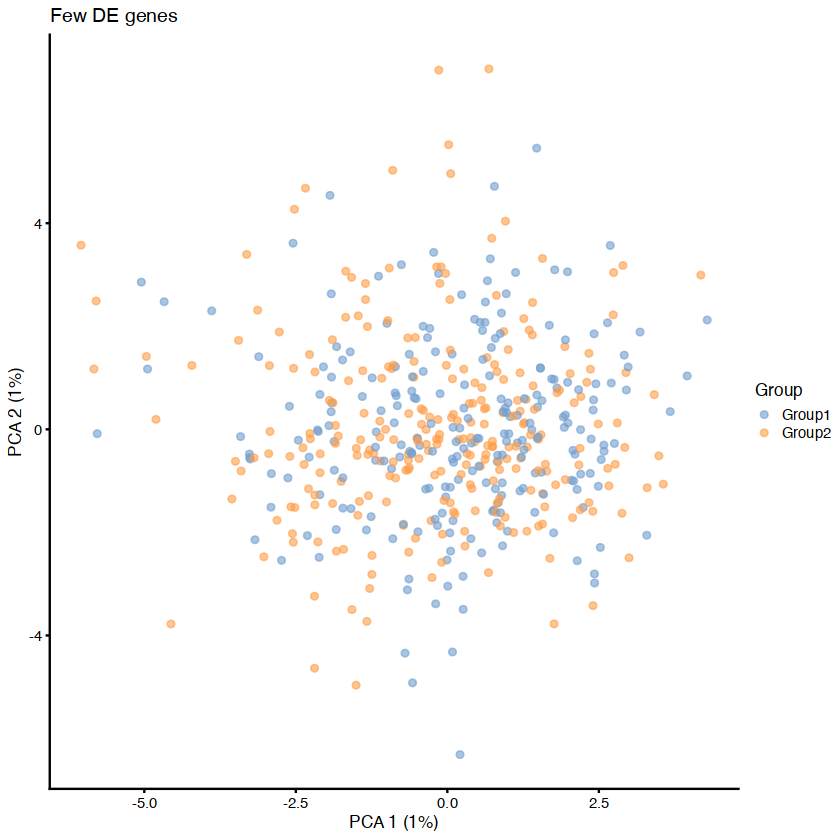

In [35]:
sim1 <- splatSimulateGroups(
    params.groups,
    group.prob = c(0.5, 0.5),
    de.prob = 0.01,
    verbose = FALSE
)
sim1 <- logNormCounts(sim1)
sim1 <- runPCA(sim1)
plotPCA(sim1, colour_by = "Group") + ggtitle("Few DE genes")

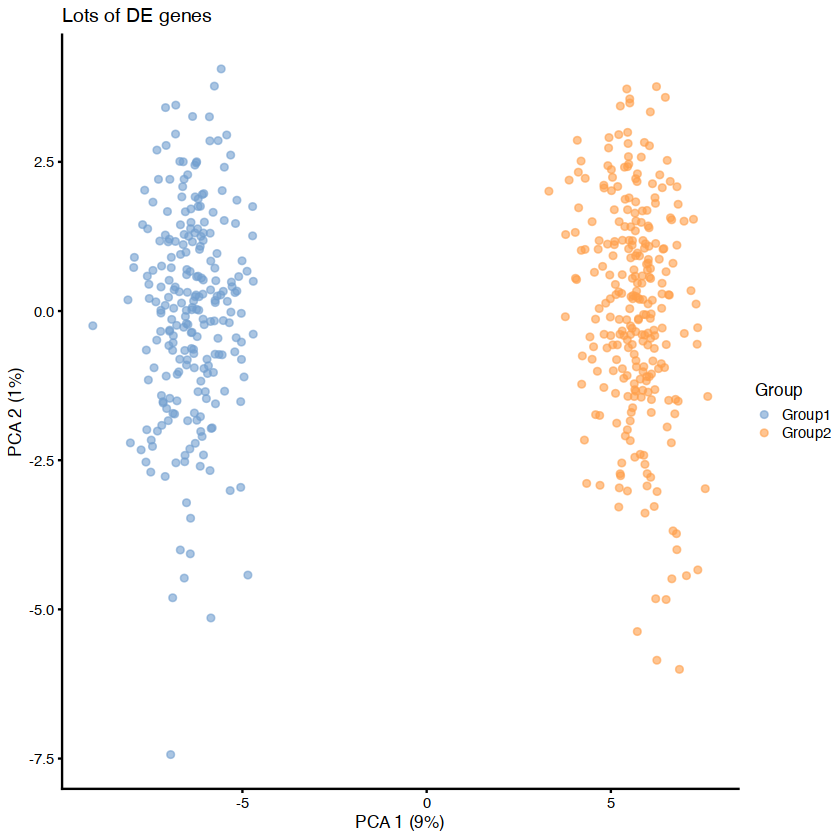

In [36]:
# Lots of DE genes
sim2 <- splatSimulateGroups(
    params.groups,
    group.prob = c(0.5, 0.5),
    de.prob = 0.3,
    verbose = FALSE
)
sim2 <- logNormCounts(sim2)
sim2 <- runPCA(sim2)
plotPCA(sim2, colour_by = "Group") + ggtitle("Lots of DE genes")

In [41]:
sim2@assays

An object of class "SimpleAssays"
Slot "data":
List of length 7
names(7): BatchCellMeans BaseCellMeans BCV CellMeans TrueCounts counts logcounts


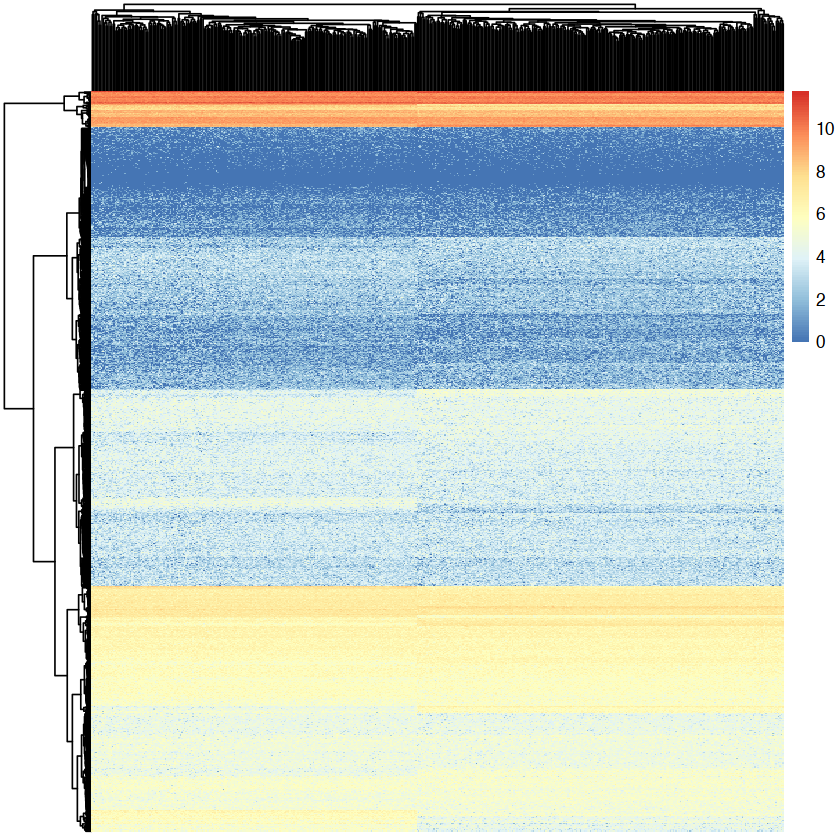

In [42]:
library(pheatmap)
pheatmap(as.matrix(assay(sim2, "logcounts")),
         show_rownames = FALSE,            
         show_colnames = FALSE, 
         width = 10, height = 10)

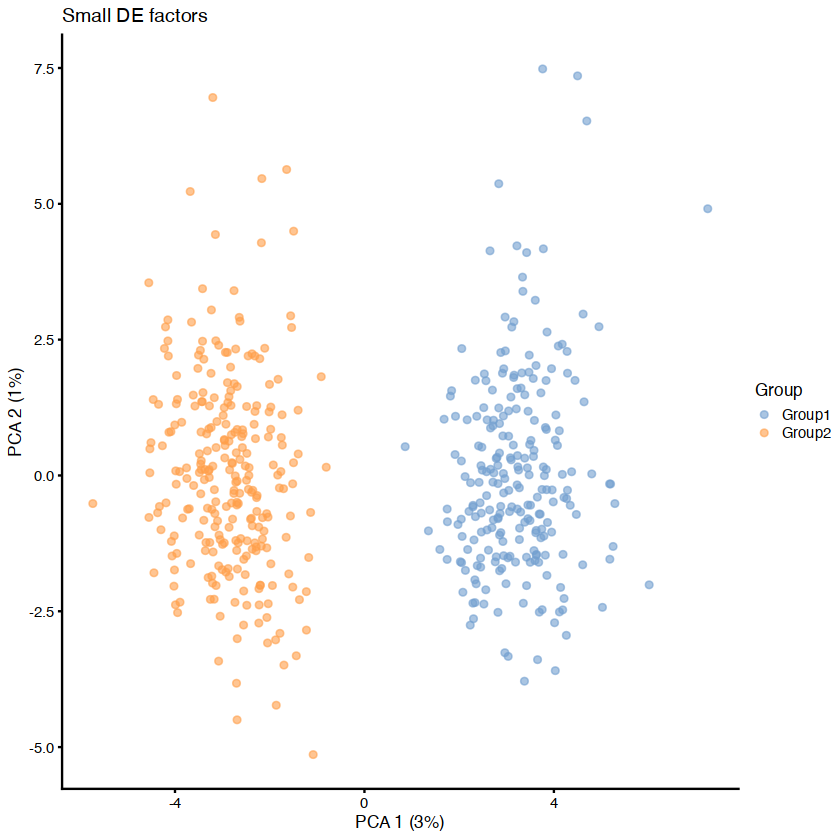

In [43]:
sim1 <- splatSimulateGroups(
    params.groups,
    group.prob = c(0.5, 0.5),
    de.facLoc = 0.01,
    verbose = FALSE
)
sim1 <- logNormCounts(sim1)
sim1 <- runPCA(sim1)
plotPCA(sim1, colour_by = "Group") + ggtitle("Small DE factors")

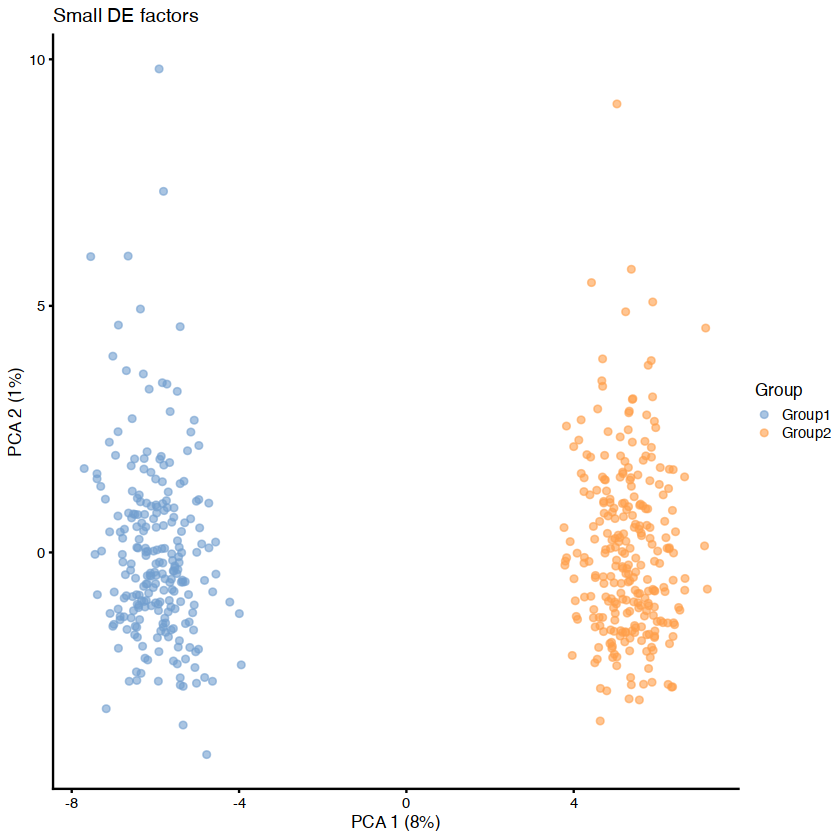

In [45]:
sim1 <- splatSimulateGroups(
    params.groups,
    group.prob = c(0.5, 0.5),
    de.facLoc = 0.5,
    verbose = FALSE
)
sim1 <- logNormCounts(sim1)
sim1 <- runPCA(sim1)
plotPCA(sim1, colour_by = "Group") + ggtitle("Small DE factors")

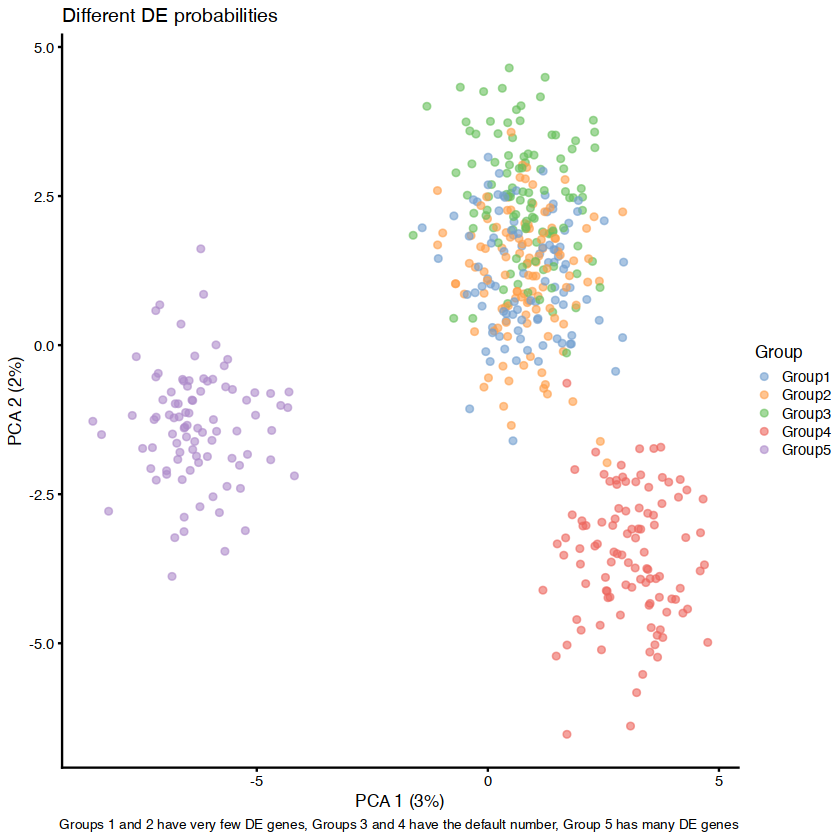

In [46]:
sim1 <- splatSimulateGroups(
    params.groups,
    group.prob = c(0.2, 0.2, 0.2, 0.2, 0.2),
    de.prob = c(0.01, 0.01, 0.1, 0.1, 0.3),
    verbose = FALSE
)
sim1 <- logNormCounts(sim1)
sim1 <- runPCA(sim1)
plotPCA(sim1, colour_by = "Group") +
    labs(
        title = "Different DE probabilities",
        caption = paste(
            "Groups 1 and 2 have very few DE genes,",
            "Groups 3 and 4 have the default number,",
            "Group 5 has many DE genes"
        )
    )

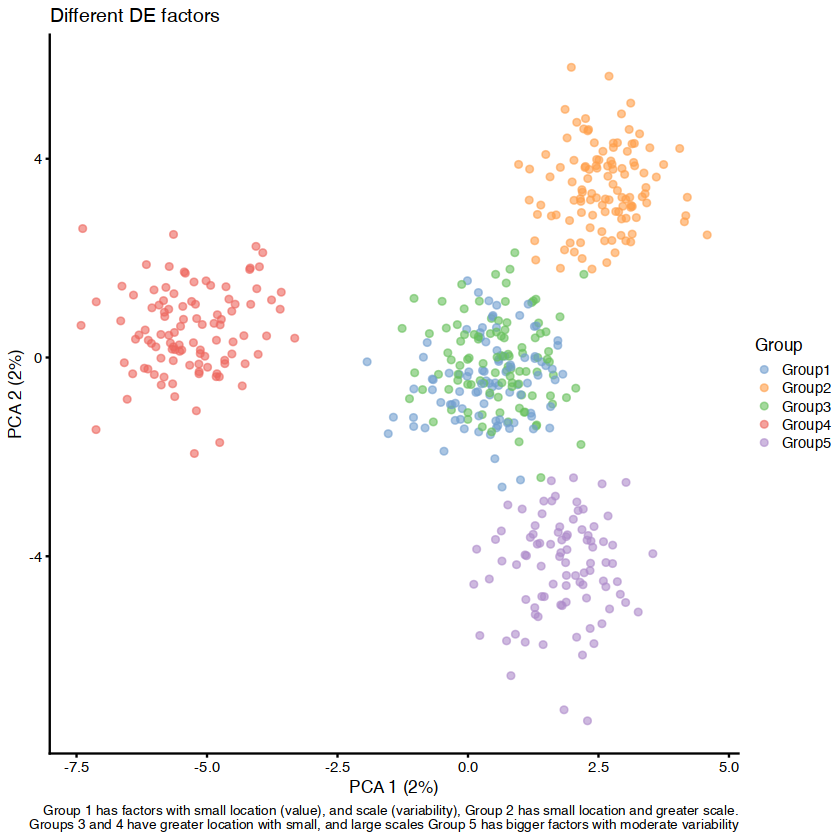

In [51]:


# Different DE factors
sim2 <- splatSimulateGroups(
    params.groups,
    group.prob = c(0.2, 0.2, 0.2, 0.2, 0.2),
    de.facLoc = c(0.01, 0.01, 0.1, 0.1, 0.2),
    de.facScale = c(0.2, 0.5, 0.2, 0.5, 0.4),
    verbose = FALSE
)
sim2 <- logNormCounts(sim2)
sim2 <- runPCA(sim2)
plotPCA(sim2, colour_by = "Group") +
    labs(
        title = "Different DE factors",
        caption = paste(
            "Group 1 has factors with small location (value),",
            "and scale (variability),",
            "Group 2 has small location and greater scale.\n",
            "Groups 3 and 4 have greater location with small,",
            "and large scales",
            "Group 5 has bigger factors with moderate",
            "variability"
        )
    )

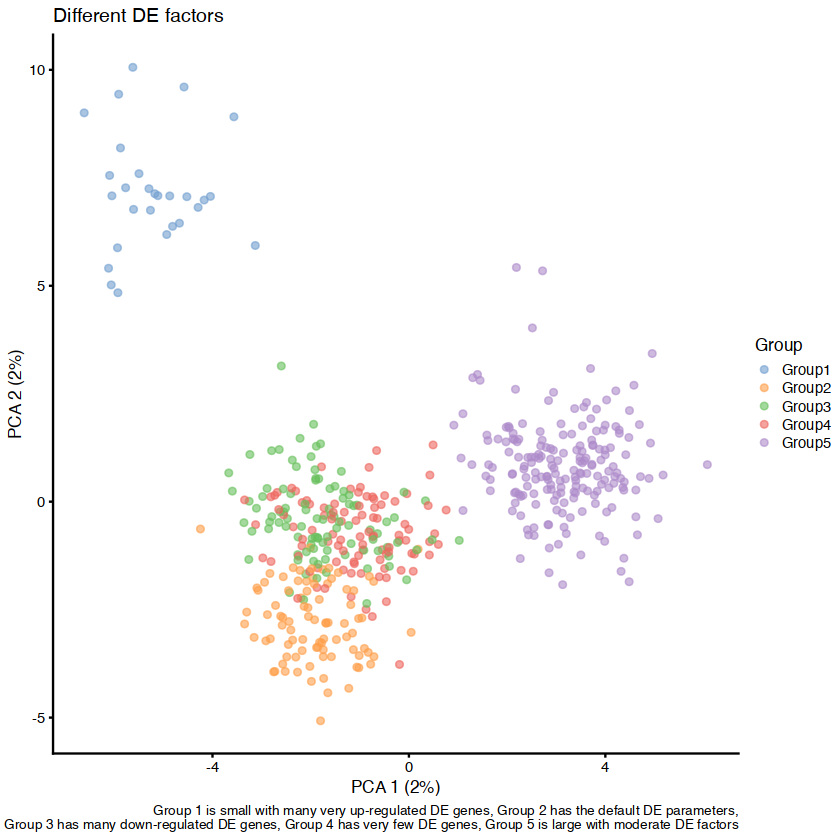

In [52]:
sim3 <- splatSimulateGroups(
    params.groups,
    group.prob = c(0.05, 0.2, 0.2, 0.2, 0.35),
    de.prob = c(0.3, 0.1, 0.2, 0.01, 0.1),
    de.downProb = c(0.1, 0.4, 0.9, 0.6, 0.5),
    de.facLoc = c(0.6, 0.1, 0.1, 0.01, 0.2),
    de.facScale = c(0.1, 0.4, 0.2, 0.5, 0.4),
    verbose = FALSE
)
sim3 <- logNormCounts(sim3)
sim3 <- runPCA(sim3)
plotPCA(sim3, colour_by = "Group") +
    labs(
        title = "Different DE factors",
        caption = paste(
            "Group 1 is small with many very up-regulated DE genes,",
            "Group 2 has the default DE parameters,\n",
            "Group 3 has many down-regulated DE genes,",
            "Group 4 has very few DE genes,",
            "Group 5 is large with moderate DE factors"
        )
    )

In [53]:
head(colData(sim3))

DataFrame with 6 rows and 5 columns
             Cell       Batch    Group ExpLibSize sizeFactor
      <character> <character> <factor>  <numeric>  <numeric>
Cell1       Cell1      Batch1   Group2    67738.1   1.094599
Cell2       Cell2      Batch1   Group2    55602.1   0.894500
Cell3       Cell3      Batch1   Group5    65074.1   1.034158
Cell4       Cell4      Batch1   Group5    61580.0   1.020638
Cell5       Cell5      Batch1   Group2    60824.2   0.969128
Cell6       Cell6      Batch1   Group5    59116.2   0.974757

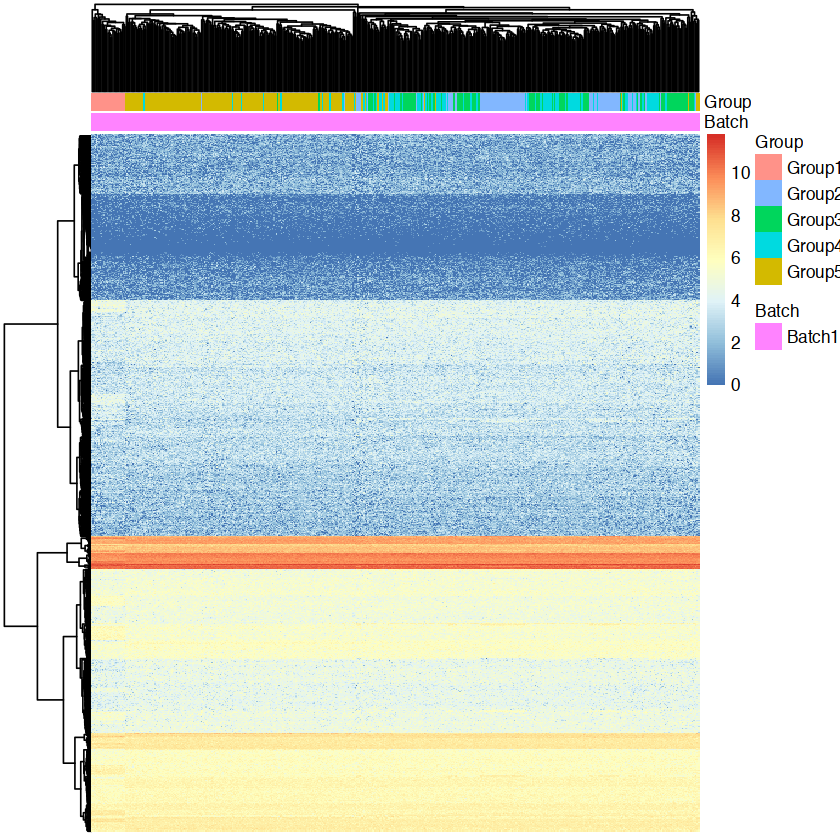

In [54]:
annotation_col <- as.data.frame(colData(sim3)[, c("Batch", "Group")])
rownames(annotation_col) <- colnames(assay(sim3, "logcounts"))

library(pheatmap)
pheatmap(as.matrix(assay(sim3, "logcounts")),
         annotation_col = annotation_col,  
         show_rownames = FALSE,            
         show_colnames = FALSE, 
         width = 10, height = 10)

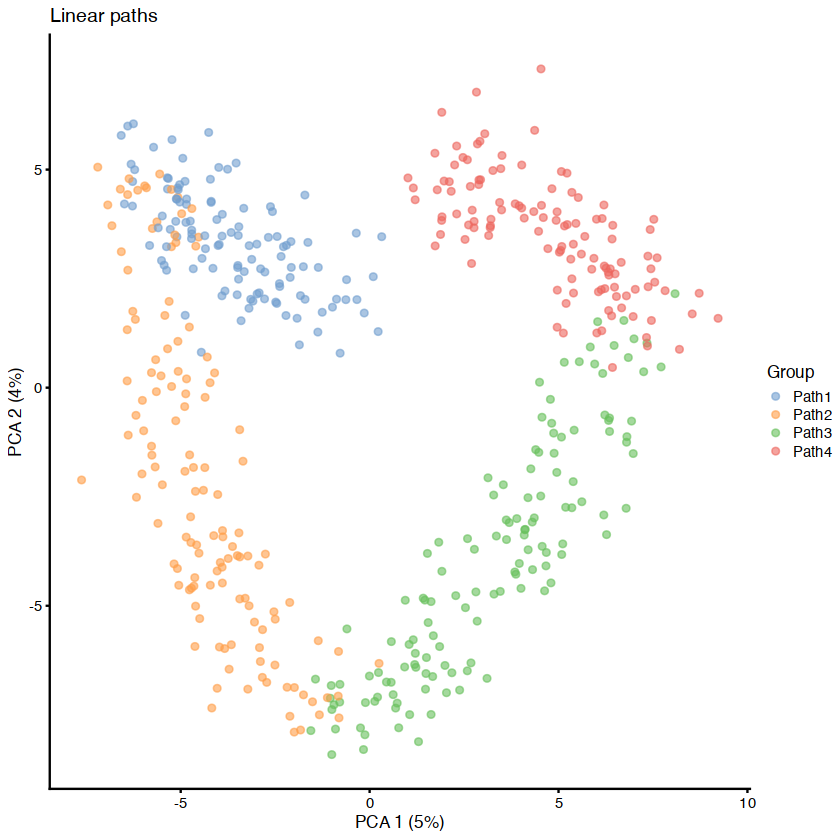

In [55]:
# Linear paths
sim1 <- splatSimulatePaths(
    params.groups,
    group.prob = c(0.25, 0.25, 0.25, 0.25),
    de.prob = 0.5,
    de.facLoc = 0.2,
    path.from = c(0, 1, 2, 3),
    verbose = FALSE
)
sim1 <- logNormCounts(sim1)
sim1 <- runPCA(sim1)
plotPCA(sim1, colour_by = "Group") + ggtitle("Linear paths")

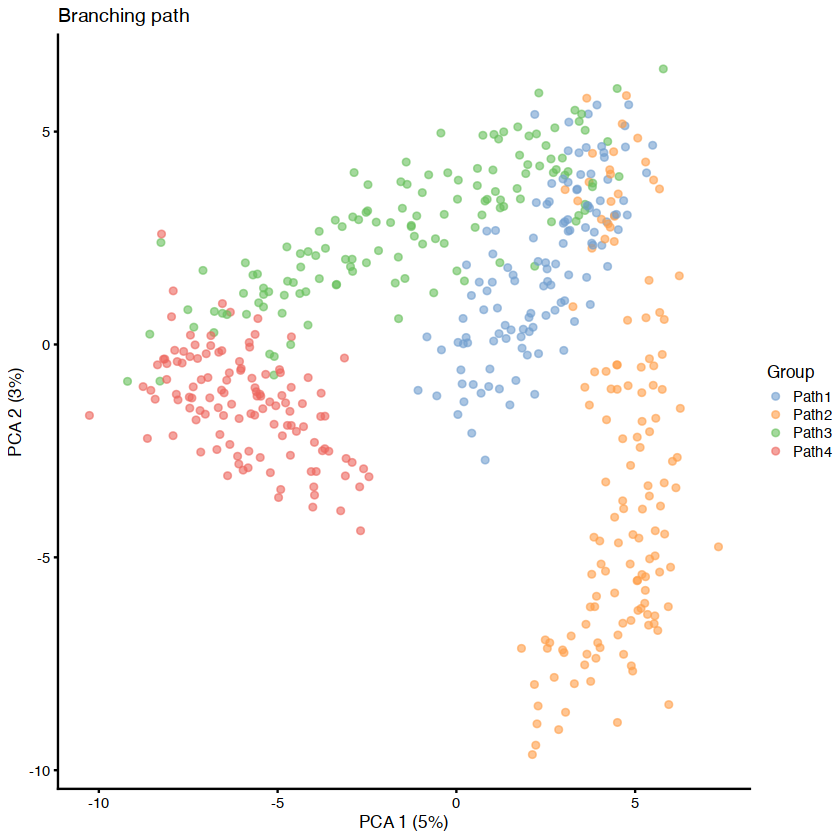

In [56]:
# Branching path
sim2 <- splatSimulatePaths(
    params.groups,
    group.prob = c(0.25, 0.25, 0.25, 0.25),
    de.prob = 0.5,
    de.facLoc = 0.2,
    path.from = c(0, 1, 1, 3),
    verbose = FALSE
)
sim2 <- logNormCounts(sim2)
sim2 <- runPCA(sim2)
plotPCA(sim2, colour_by = "Group") + ggtitle("Branching path")

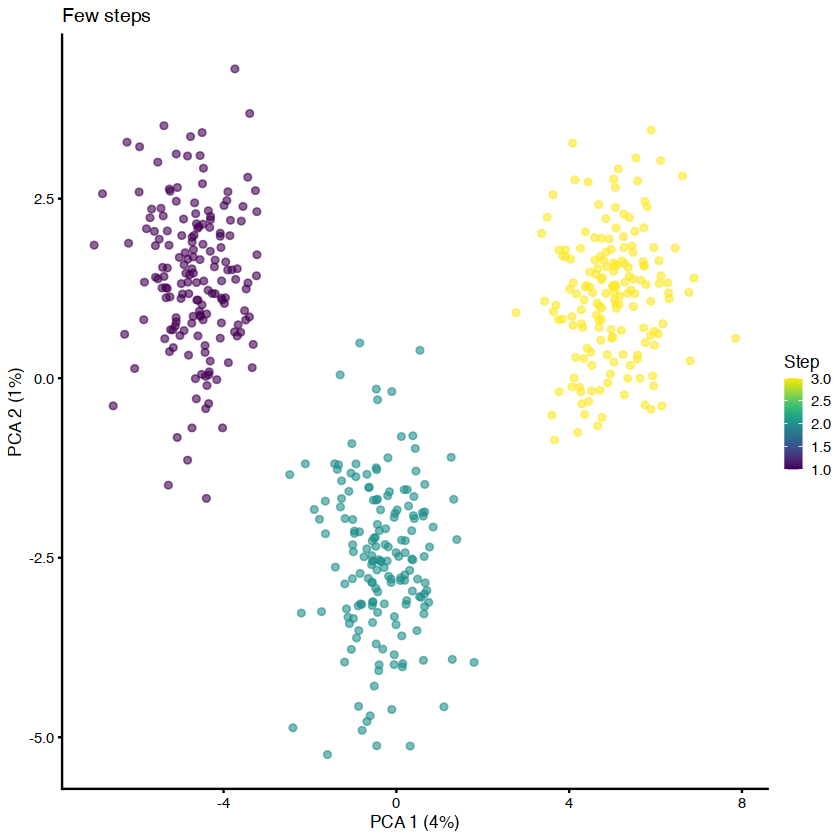

In [57]:
# Few steps
sim1 <- splatSimulatePaths(
    params.groups,
    path.nSteps = 3,
    de.prob = 0.5,
    de.facLoc = 0.2,
    verbose = FALSE
)
sim1 <- logNormCounts(sim1)
sim1 <- runPCA(sim1)
plotPCA(sim1, colour_by = "Step") + ggtitle("Few steps")

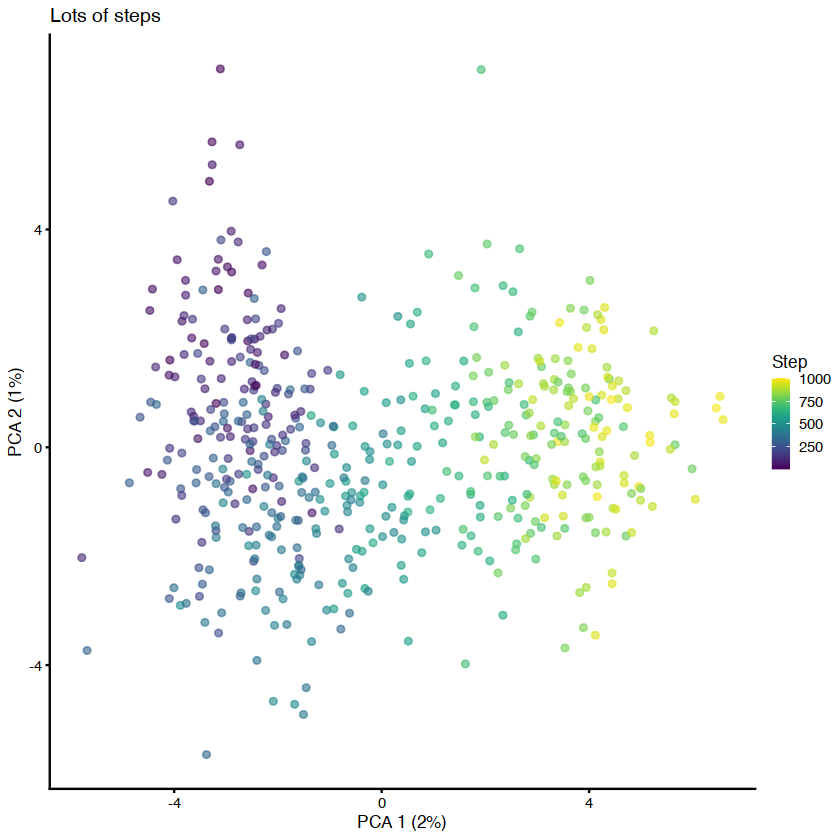

In [58]:
# Lots of steps
sim2 <- splatSimulatePaths(
    params.groups,
    path.nSteps = 1000,
    de.prob = 0.5,
    de.facLoc = 0.2,
    verbose = FALSE
)
sim2 <- logNormCounts(sim2)
sim2 <- runPCA(sim2)
plotPCA(sim2, colour_by = "Step") + ggtitle("Lots of steps")

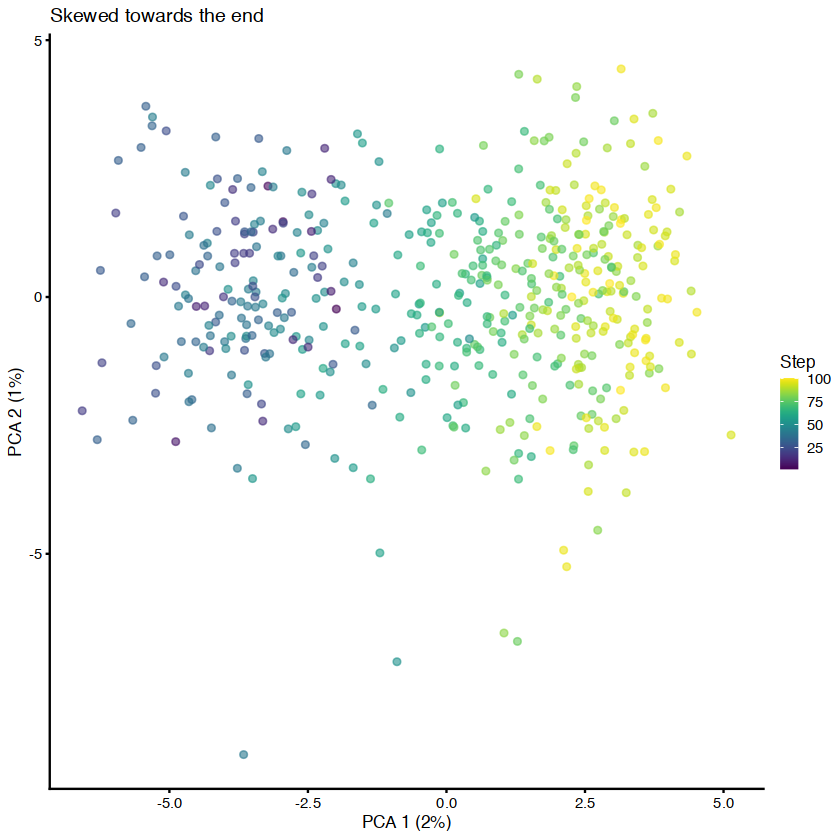

In [59]:
# Skew towards the end
sim1 <- splatSimulatePaths(
    params.groups,
    path.skew = 0.1,
    de.prob = 0.5,
    de.facLoc = 0.2,
    verbose = FALSE
)
sim1 <- logNormCounts(sim1)
sim1 <- runPCA(sim1)
plotPCA(sim1, colour_by = "Step") + ggtitle("Skewed towards the end")